Looking at the night sky, the pattern of stars on the surface of the sky follows a familiar pattern. The Big Dipper, Cassiopeia, the Pleiades, or Orion are popular landmarks in the sky. Different civilisations labelled them using names of so-called constellations. However, this pattern is often the result of pure chance as stars from one constellation belong often to remote areas in the universe and they have this familiarity because the rate at which stars move is much shorter than the lifespan of humanity.

I am curious here to study the density of stars as they appear on the surface of the sky and if some generic principles could be used to characterize it. This is my attempt to answer the question 

https://astronomy.stackexchange.com/questions/43147/density-of-stars-on-the-surface-of-the-sky

(but also to make the formulation of the question clearer...)

The main assumption is that in the model we will formulate, there is no structure and the position of stars is drawn completly randomly. Comparing the resulting night sky for this model to that observed from earth, we will perhaps learn more about the balance between structure (Milky way, clusters, ...) and what is more characteristic of a noisy arrangment of matter.

In the end of this notebook, we should be able to generate images like 

![astro gen](../files/2021-03-27_generative.png)

which captures pretty well what you could observe in the sky during a clear night.

<!-- TEASER_END -->

Let's first initialize the notebook:

In [1]:
#### from __future__ import division, print_function
import numpy as np
np.set_printoptions(precision=6, suppress=True)
import os
%matplotlib inline
#%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
phi = (np.sqrt(5)+1)/2
fig_width = 15
figsize = (fig_width, fig_width/phi)
%load_ext autoreload
%autoreload 2

# 3D Poisson noise

Let's first the most neutral way of placing stars at random in a infinite, Euclidean space. No relativity, no time, no fuss, just to simplify things. Another assumption: We will consider that all light sources on the night sky will be point sources. This assumption is justified if we consider the size of stellar objects comared to their distance and you need an educated eye for instance to know that at the position of the Andromeda galaxy, there is more than a point of light. More on this latter, notably on the fact that brighter stars appear visually bigger.

While these assumptions seem reasonable, we will assume a further hypothesis for the placements of stars in space: There is *on average* a uniform density of star per unit of volume. That is, per cube of space, there will be a stationary number of stars. 

The most neutral way of drawing independent and identically distributed density of stars per cube in space. This can be modeled for instance by a [3D Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution). A 3D Poisson distribution consists in drawing random positions in space independently for the 3 axis and independently for the different points.  

## 1D Poisson noise

Let's set the limits of the "1D box" (a segment) to 0 and 1 and draw one hundred positions:

In [2]:
np.random.seed(2001) # a space odyssey
N_stars = 100
pos = np.random.uniform(size=(N_stars))

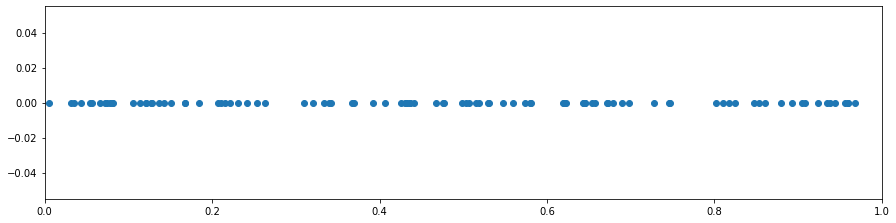

In [3]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**3))
ax.scatter(pos, np.zeros_like(pos))
ax.set_xlim(0, 1);

## 2D Poisson noise

We can repeat the same process in 2D:

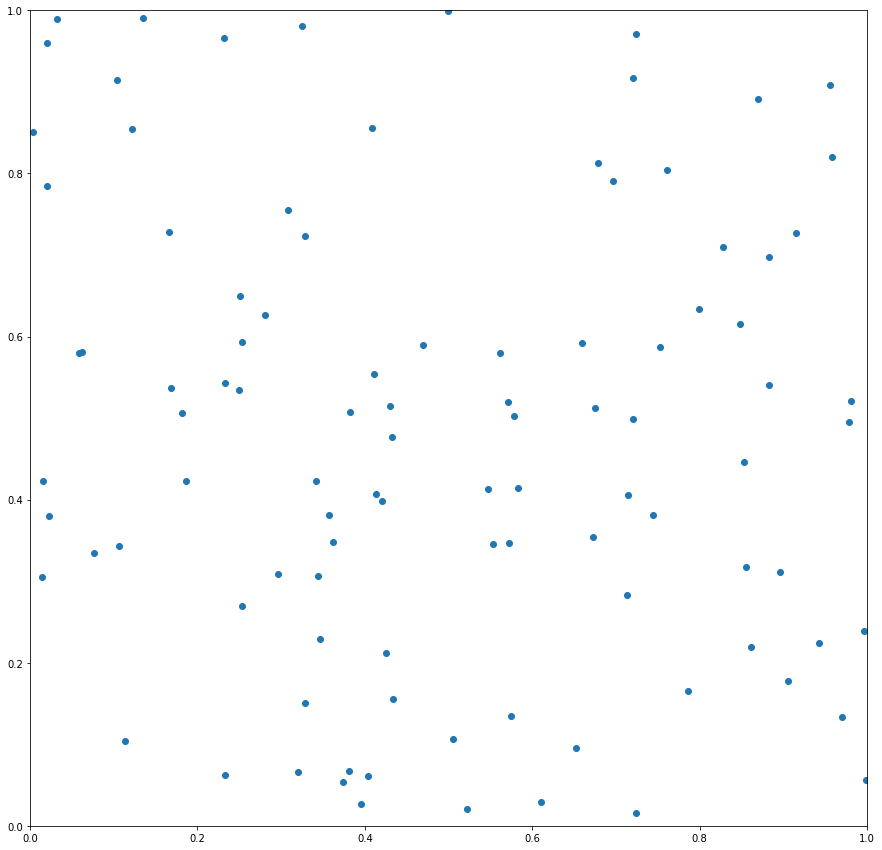

In [4]:
pos = np.random.uniform(size=(2, N_stars))
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.scatter(pos[0, :], pos[1, :])
ax.set_xlim(0, 1)
ax.set_ylim(0, 1);

## 3D Poisson noise

and in 3D - just the [visualization gets different](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html):


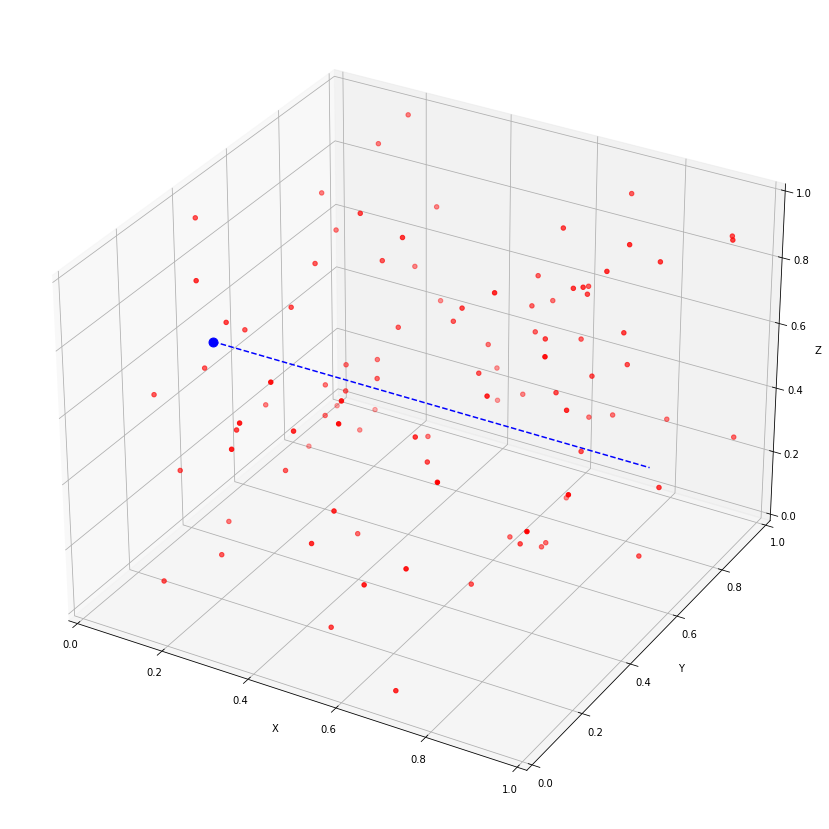

In [5]:
pos = np.random.uniform(size=(3, N_stars))
fig, ax = plt.subplots(figsize=(fig_width, fig_width), subplot_kw=dict(projection='3d'))
ax.scatter(pos[0, :], pos[1, :], pos[2, :], s=20, c='r')
ax.scatter([0], [.5], [.5], s=80, c='b')
ax.plot([0, 1], [.5, .5], [.5, .5], c='b', ls='--')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');

The big blue dot would represent a point of observation (the earth!) from which we would see these stars and the dashed line a line of sight. 

Imagine that you would travel along this line with a constant velocity, this is what you would see:

![star flow](https://raw.githubusercontent.com/NaturalPatterns/StarField/master/starfield.gif)

(more on this in https://github.com/NaturalPatterns/StarField)

# Mathematical modeling

## projecting absolute coordinates to azimuth and elevation

Let's use the dashed line defined above as the line of sight - giving the depth in our resulting image.
Knowing the position of the observer (let's say $(x, y, z) = (0, 0 , 0)$) and that of stars relative to it, one can compute the azimuth $a$ and elevation $e$ as:

$$
a = \arctan \frac z x \\
e = \arctan \frac y x
$$

We will supose that we look at a fairly small area in the sky, such that the volume we look at looks in cross-section to:

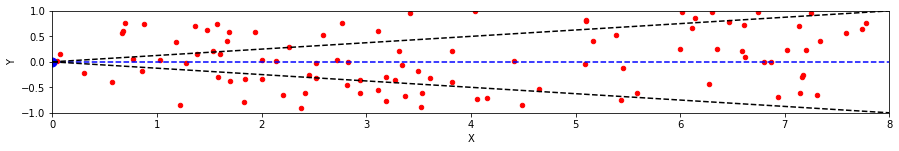

In [6]:
pos = np.random.uniform(size=(3, N_stars))
depth = 8
pos[0, :] *= depth
pos[1, :] = (pos[1, :]-.5)*2
pos[2, :] = (pos[2, :]-.5)*2

fig, ax = plt.subplots(figsize=(fig_width, fig_width/depth))
ax.scatter(pos[0, :], pos[1, :], s=20, c='r')
ax.scatter([0], [0], s=80, c='b')
ax.plot([0, depth], [0, 0], c='b', ls='--')
ax.plot([0, depth], [0, -1.], c='k', ls='--')
ax.plot([0, depth], [0, 1.], c='k', ls='--')
ax.set_xlim(0, depth)
ax.set_ylim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y');

We deduce that the span of visual angle we look at is limited to an angle of:

In [7]:
angle_max = np.arctan2(1, depth)
print(f'FOV = {2*angle_max*180/np.pi:.3f} deg')

FOV = 14.250 deg


In particular, I personnaly use an [evScope](https://unistellaroptics.com/) with that sensor:

* Sensor Technology: Sony Exmor with NIR technology Sensor Model IMX224
* Sensor: 1/3” CMOS IMX224/IMX225
* Resolution: 1.2Mega Pixels 1304X976
* Pixel Size: 3.75µm
* Sensor Size: 4.8mm*3.6mm
* Diagonal: 6.09mm
* Exposure Rage: 32µs-1000s

With a length of 450 mm, an aperture of 4.5 inches (11.4 cm), we get a similar field of view:

In [8]:
print(f'FOV = {2*np.arctan2(11.4/2, 45)*180/np.pi:.3f} deg')

FOV = 14.438 deg


In [9]:
az = np.arctan2(pos[1, :], pos[0, :])
el = np.arctan2(pos[2, :], pos[0, :])

such that we may make some computations, for instance that we will not see the stars out of the field of view:

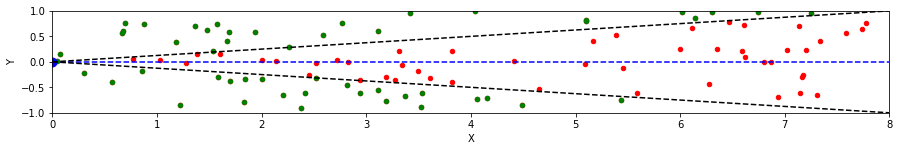

In [10]:
ind_out = np.maximum(np.abs(az), np.abs(el)) > angle_max # this is the right filter in 3D
ind_out = np.abs(az) > angle_max # that's the filter in 2D for the azimuth only

fig, ax = plt.subplots(figsize=(fig_width, fig_width/depth))
ax.scatter(pos[0, :], pos[1, :], s=20, c='r')
ax.scatter(pos[0, ind_out], pos[1, ind_out], s=20, c='g')
ax.scatter([0], [0], s=80, c='b')
ax.plot([0, depth], [0, 0], c='b', ls='--')
ax.plot([0, depth], [0, -1.], c='k', ls='--')
ax.plot([0, depth], [0, 1.], c='k', ls='--')
ax.set_xlim(0, depth)
ax.set_ylim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y');

The stars in these new coordinates look like this:

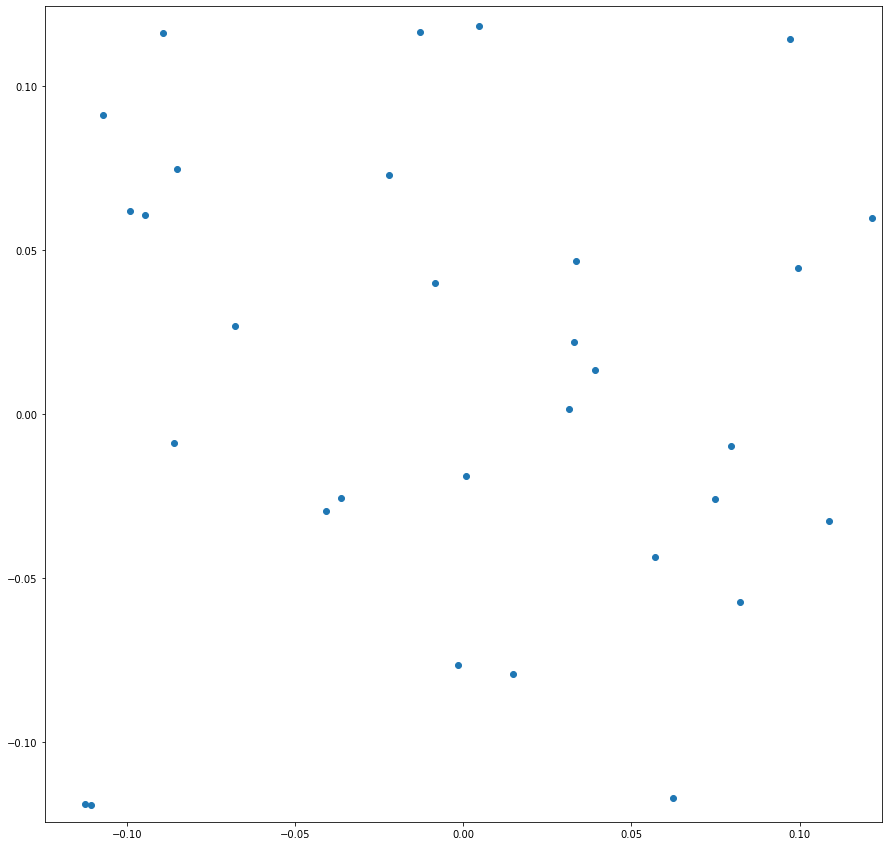

In [11]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.scatter(az, el)
ax.set_xlim(-angle_max, angle_max)
ax.set_ylim(-angle_max, angle_max);

which looks like a new 2D Poisson noise. This is normal and results from the way we have drawn the positions independently. We may as well have drawn the azimuth and elevation randomly! However, we also have a value for the distance:

$$
d = \sqrt{ x^2 + y^2 + z^2} 
$$

such that we might modulate the intensity of the star inversely proportionnally to its distance :

In [12]:
# Star colors http://www.isthe.com/chongo/tech/astro/HR-temp-mass-table-byhrclass.html http://www.vendian.org/mncharity/dir3/starcolor/
O3 = np.array([144., 166., 255.])
O3 /= 255.
#self.pos[:, 3:-1] = O3[None, :]
M4Ia = np.array([255., 185., 104.])
M4Ia /= 255.

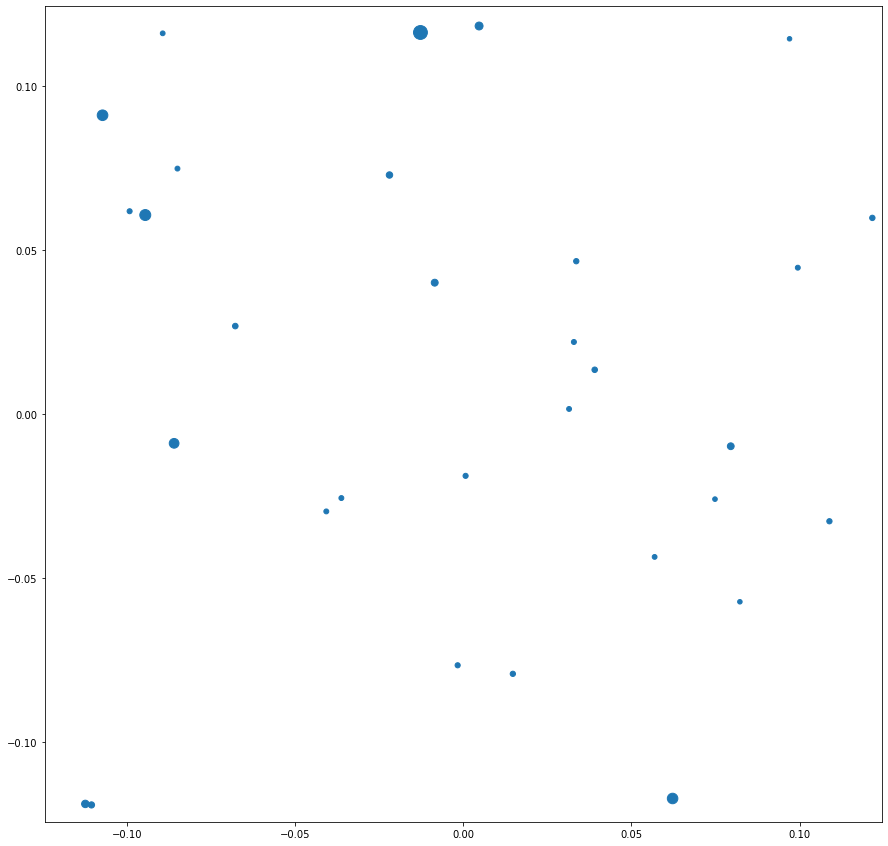

In [13]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
d = np.sqrt((pos**2).sum(axis=0))

ax.scatter(az, el, s=20 * d.max()**2/d**2)#, c=O3)
ax.set_xlim(-angle_max, angle_max)
ax.set_ylim(-angle_max, angle_max);

This looks more natural... This dependance on the apparent luminosity of stars as a function of distance is pretty straightfoward: considering the star as a point-like source radiating photons uniformly in all directions, the energy emitted after time $t$ gets concentrated on the sphere of radius $d = c\cdot t$, with $c$ the celerity of light. The surface of this sphere is thus $4 \cdot \pi d^2$ which conserves its total energy. As a consequence, the apparent energy of a star is [inversely proportional to the squared distance](https://en.wikipedia.org/wiki/Inverse-square_law).


## distribution of energies

let's now imagine that we are in the center of a huge ball of space and that we estimate the distances:

In [14]:
N_stars = 1000 * 1000  * 10
pos = np.random.uniform(size=(3, N_stars))
pos[0, :] = (pos[0, :]-.5)*2
pos[1, :] = (pos[1, :]-.5)*2
pos[2, :] = (pos[2, :]-.5)*2
d = np.sqrt((pos**2).sum(axis=0))
ind_ball = d < 1

and thus the luminances:

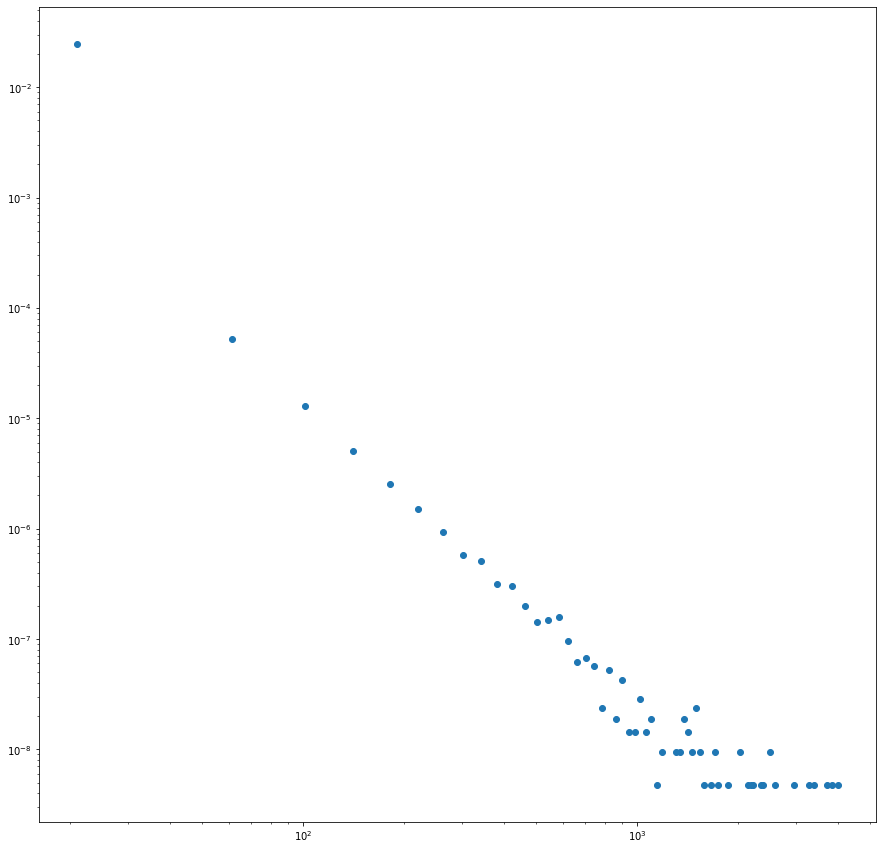

In [15]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
hist, bin_edges = np.histogram(1/(d[ind_ball]+1e-2)**2, bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, hist, 'o')
ax.set_xscale('log')
ax.set_yscale('log');

This probability density function looks like a power-law (well fitted by a line in this log-log plot). Let's prove it:

Let's first start with the distance $d$ with:
$$
d^2 = x^2 + y^2 + z^2
$$
Let's imagine a star at a uniform position in space. The probability of the density being less than $D$ is:
$$
Pr(d\leq D) = \frac 1 Z \frac 4 3 \pi D^3
$$
where $Z$ is a normalization constant. The probability density is therefore
$$
Pr(d) \propto d^2
$$
 
We have the intensity for any given point given by
$$
I = \frac 1 {d^2} = g(d)
$$
where $g$ is the monotonous transformation of variable. One can thus operate a [change of variable](https://en.wikipedia.org/wiki/Probability_density_function#Scalar_to_scalar) such that with $d=g^{-1}(I)$:
$$
Pr(I) = \frac d {dI} g^{-1}(I) \cdot Pr(g^{-1}(I))
$$
with $g^{-1}(I)= \frac 1 {\sqrt{I}}$ and $ \frac d {dI} (g^{-1}(I)) = - \frac 1 2  I^{-\frac 3 2}$. Since $Pr(d) \propto d^2$ and $d^2 = \frac 1 I$, we finally have:

$$
Pr(I) \propto  I^{-\frac 5 2}
$$

As a consequence, the probability density function for the intensity of a star follows a power-law with exponent $-2.5$. Let's verify this on the synthetic example:

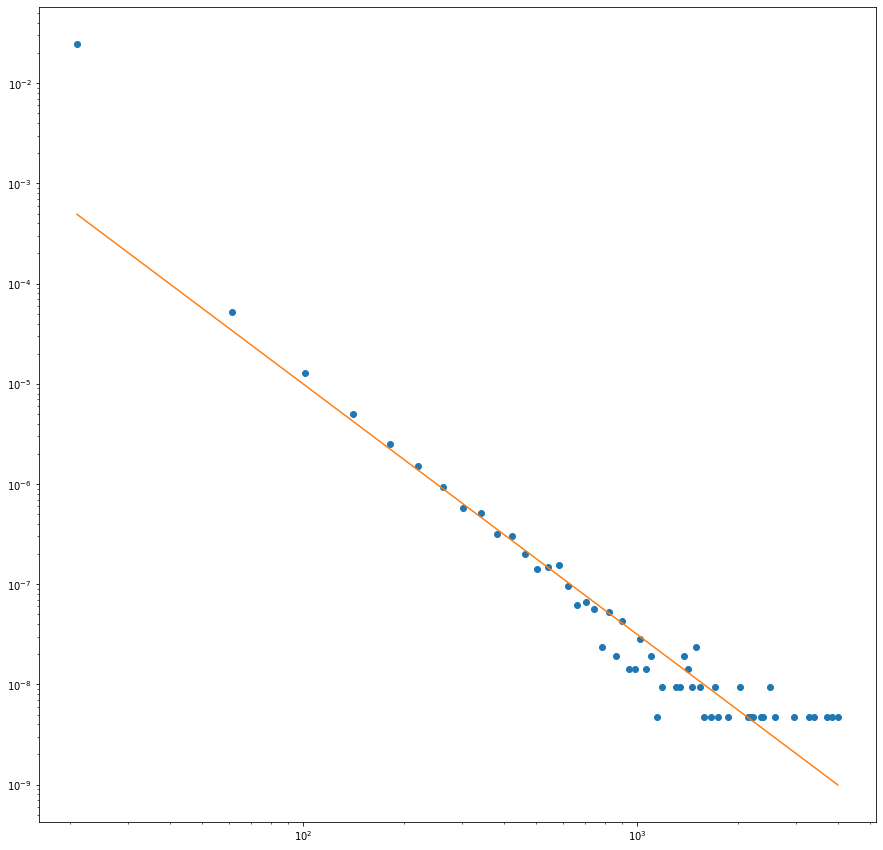

In [16]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
hist, bin_edges = np.histogram(1/(d[ind_ball]+1e-2)**2, bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, hist, 'o')
ax.plot(bin_centers, bin_centers**(-5/2), '-')
ax.set_xscale('log')
ax.set_yscale('log');

Note that this behaviour does not change much for other smooth distributions, like the normal distribution :

In [17]:
N_stars = 1000 * 1000  * 10
pos = np.random.normal(size=(3, N_stars))
d = np.sqrt((pos**2).sum(axis=0))

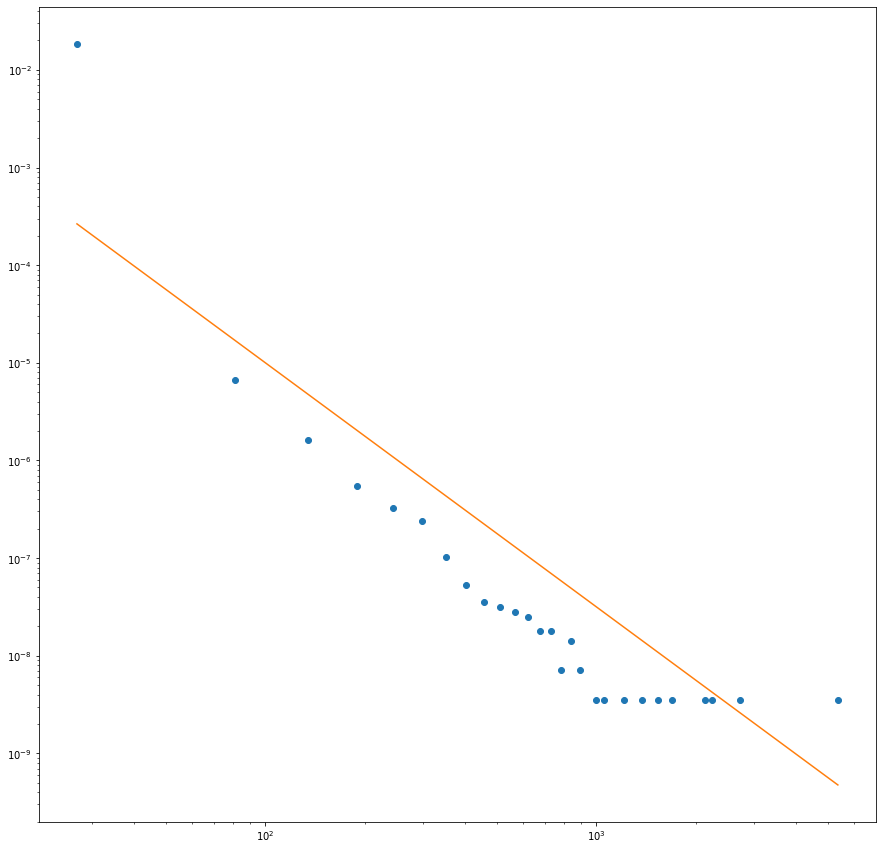

In [18]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
hist, bin_edges = np.histogram(1/(d[ind_ball]+1e-2)**2, bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, hist, 'o')
ax.plot(bin_centers, bin_centers**(-5/2), '-')
ax.set_xscale('log')
ax.set_yscale('log');

TODO: add the fact that there is a power law for star size and absolute brightness

## image synthesis

Astronomy images under this model are produced by the combination of a single kernel with these sparse events. These sparse events are drawn as a 3D poisson noise and coefficients are drawn according to power-law described above. These will be convolved with a kernel defined using the [MotionClouds](https://github.com/NeuralEnsemble/MotionClouds) library. Let's illustrate that for the following image size:

In [19]:
N_X, N_Y = 2**10, 2**10

Let's draw coefficients according to a [Pareto law](https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html):

In [20]:
scale, a = 2.e-3, 1.5

events = scale * np.random.pareto(a=a, size=(N_X, N_Y))

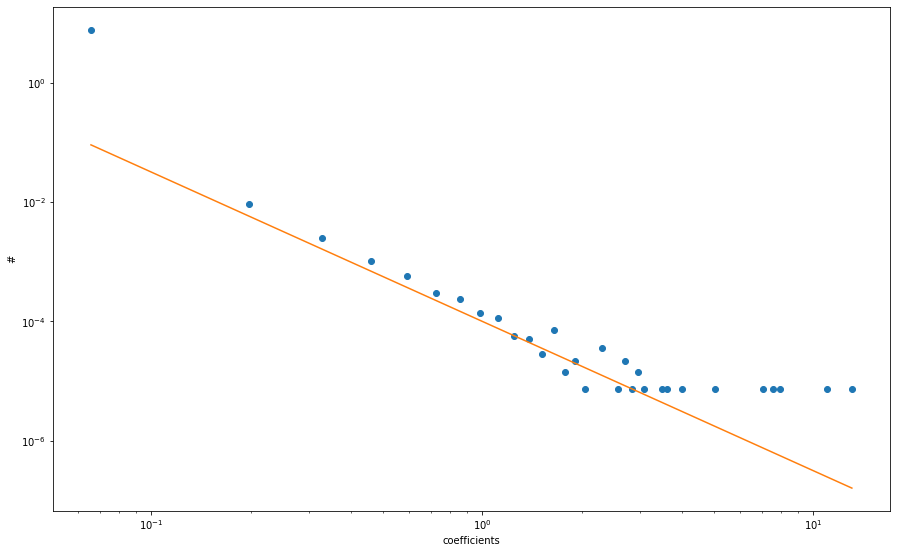

In [21]:
fig, ax = plt.subplots(figsize=figsize)
hist, bin_edges = np.histogram(events.ravel(), bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, hist, 'o')
ax.plot(bin_centers, 1e-4 * bin_centers**(-5/2), '-')

ax.set_xlabel('coefficients')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('#');

In [22]:
print('mean, std, max=', events.mean(), events.std(), events.max())

mean, std, max= 0.00392131679587419 0.03044310868454139 13.12712852878766


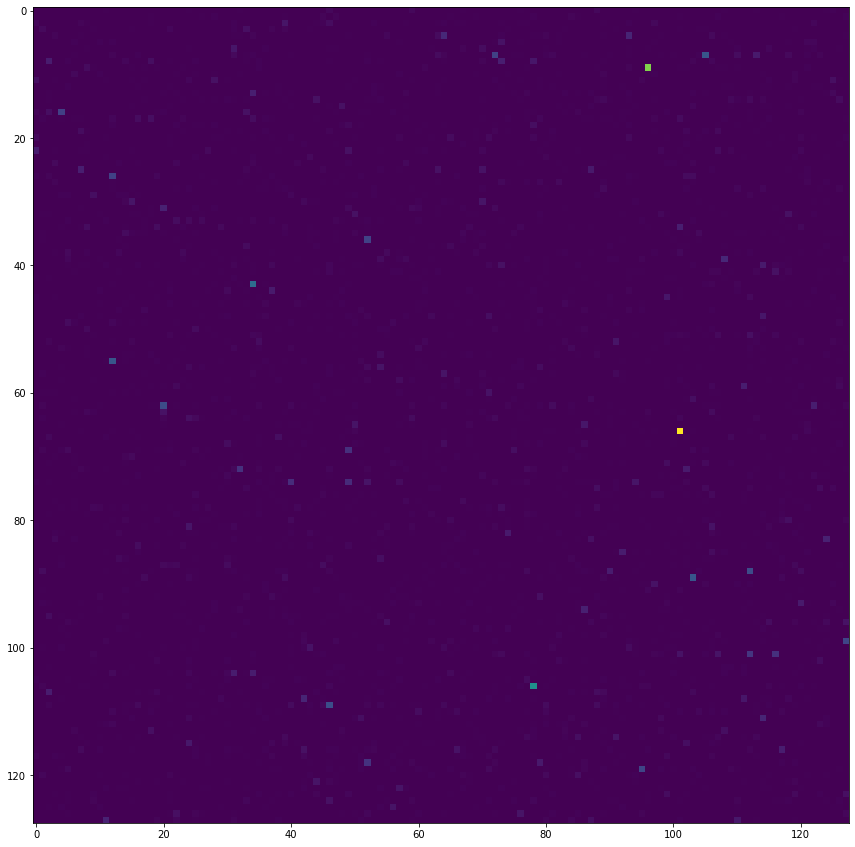

In [23]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.imshow(events[:128, :128], cmap=plt.viridis());

Let's now generate the image by convolving it with a kernel corresponding to the aperture of the telescope:

In [24]:
mc.envelope_color??

Object `mc.envelope_color` not found.


In [25]:
import MotionClouds as mc
fx, fy, ft = mc.get_grids(N_X, N_Y, 1)
F_star = mc.envelope_color(fx, fy, ft, alpha=1)
#F_star /= np.abs(fx) + np.abs(fy) + 1.e-3
F_star = F_star.squeeze()
F_star[N_X//2, N_Y//2] = 0 # F_star.max()
#F_star /= np.sqrt((F_star**2).sum())

TODO : use the FFT of an image / airy disk

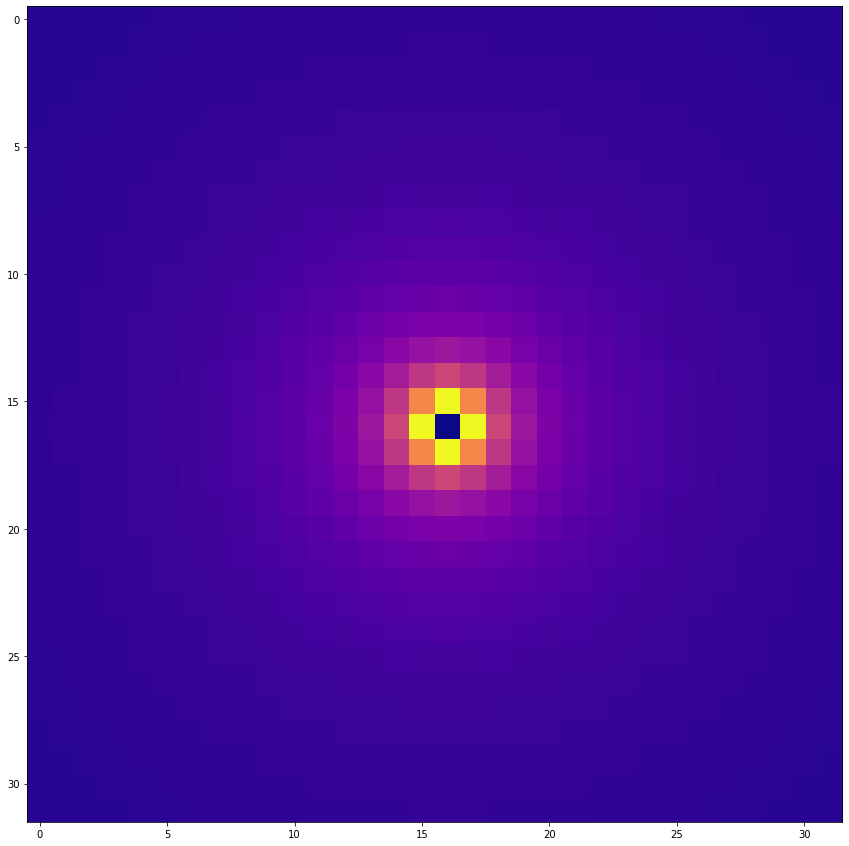

In [26]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.imshow(F_star.squeeze()[(N_X//2-16):(N_X//2+16), (N_Y//2-16):(N_Y//2+16)], cmap=plt.plasma());

In [27]:
def random_cloud(envelope, events):
    (N_X, N_Y) = envelope.shape
    #fx, fy, ft = mc.get_grids(N_X, N_Y, N_frame)    
    F_events = np.fft.fftn(events)
    F_events = np.fft.fftshift(F_events)
    
    Fz = F_events * envelope
    # de-centering the spectrum
    Fz = np.fft.ifftshift(Fz)
    #Fz[0, 0, 0] = 0. # removing the DC component
    z = np.fft.ifftn(Fz).real
    return z

In [28]:
saturation = 1.
x = random_cloud(F_star, events=events)
x = x.reshape((N_X, N_Y))
print('x.min, median, mean, x.max = ', x.min(), np.median(x), x.mean(), x.max())
x = np.minimum(x, saturation)
print('x.min, median, mean, x.max = ', x.min(), np.median(x), x.mean(), x.max())
print('x.shape=', x.shape)

x.min, median, mean, x.max =  -0.3763370136532176 -0.021399128679779195 2.3852447794681098e-18 46.1656037427305
x.min, median, mean, x.max =  -0.3763370136532176 -0.021399128679779195 -0.002443454566298285 1.0
x.shape= (1024, 1024)


TODO: add colors

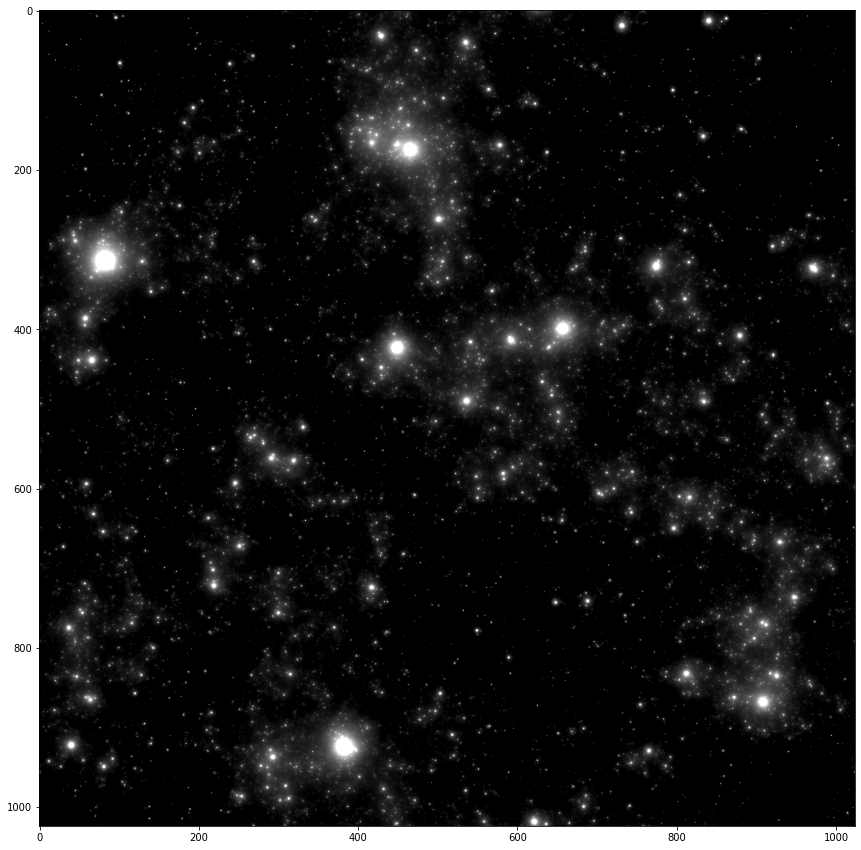

In [29]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.imshow(x, cmap=plt.gray(), vmin=0, vmax=x.max());

All in one function:

In [30]:
def MC_env(N_X, N_Y):
    fx, fy, ft = mc.get_grids(N_X, N_Y, 1)
    F_star = mc.envelope_color(fx, fy, ft, alpha=1.0).squeeze()
    F_star[N_X//2, N_Y//2] = 0
    return F_star
F_star = MC_env(N_X, N_Y)

In [31]:
%%timeit
F_star = MC_env(1024, 1024)

48.3 ms ± 599 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
def model(envelope, events, saturation=1., verbose=False):
    if verbose: print('envelope.shape = ', envelope.shape)
    if verbose: print('events.shape = ', events.shape)
    N_X, N_Y = envelope.shape[0], envelope.shape[1]
    x = random_cloud(envelope, events=events)
    x = x.reshape((N_X, N_Y))
    if saturation < np.inf:
        x = np.minimum(x, saturation)
    if verbose: print('x.min, median, mean, x.max = ', x.min(), np.median(x), x.mean(), x.max())
    if verbose: print('x.shape=', x.shape)
    return x
x = model(F_star, events, verbose=True)

envelope.shape =  (1024, 1024)
events.shape =  (1024, 1024)
x.min, median, mean, x.max =  -0.3763370136532176 -0.021399128679779195 -0.002443454566298285 1.0
x.shape= (1024, 1024)


In [33]:
%%timeit
model(F_star, events)

111 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
def generative_model(env, a=a, scale=scale, rho=1.e-3, seed=42, saturation=1., verbose=False):
    N_X, N_Y = env.shape
    if verbose: print('N_X, N_Y, N_frame = ', env.shape)
    np.random.seed(seed)
    events = scale*np.random.pareto(a=a, size=(N_X, N_Y))
    
    threshold = np.quantile(events.ravel(), 1-rho)
    events = events  * (events > threshold)

    x = model(env, events, saturation=saturation, verbose=verbose)
    return events, x
events, x = generative_model(F_star, verbose=True)

N_X, N_Y, N_frame =  (1024, 1024)
envelope.shape =  (1024, 1024)
events.shape =  (1024, 1024)
x.min, median, mean, x.max =  -0.19959926310453055 -0.015422139675558376 -0.0024464757060729016 1.0
x.shape= (1024, 1024)


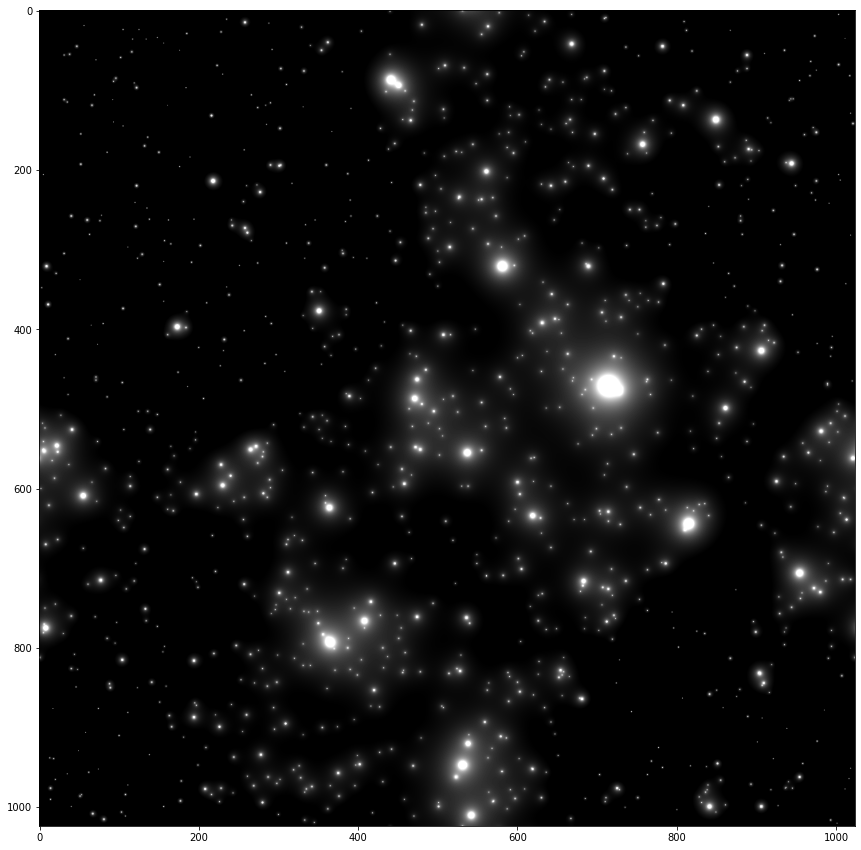

In [35]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.imshow(x, cmap=plt.gray(), vmin=0, vmax=x.max());

In [36]:
F_star = MC_env(1024, 1024)

In [37]:
%%timeit
events, x = generative_model(F_star)

249 ms ± 63.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## noise and sensor saturation

Let's add some sensor noise with white exponential noise :

In [38]:
F_star = MC_env(N_X, N_Y)
events, x = generative_model(F_star, saturation=np.inf, verbose=True)
x[x<0] = 0
noise = .02
saturation = 1. #np.inf
x_noise = np.minimum(x + noise * np.random.exponential(size=x.shape), saturation)

N_X, N_Y, N_frame =  (1024, 1024)
envelope.shape =  (1024, 1024)
events.shape =  (1024, 1024)
x.min, median, mean, x.max =  -0.19959926310453055 -0.015422139675558376 6.938893903907228e-18 49.75377106501669
x.shape= (1024, 1024)


TODO: this may be converted to a [magnitude](https://en.wikipedia.org/wiki/Apparent_magnitude#Calculations) or https://clarkvision.com/articles/astrophotography.image.processing/

In [39]:
# x_noise = np.log10(x_noise)

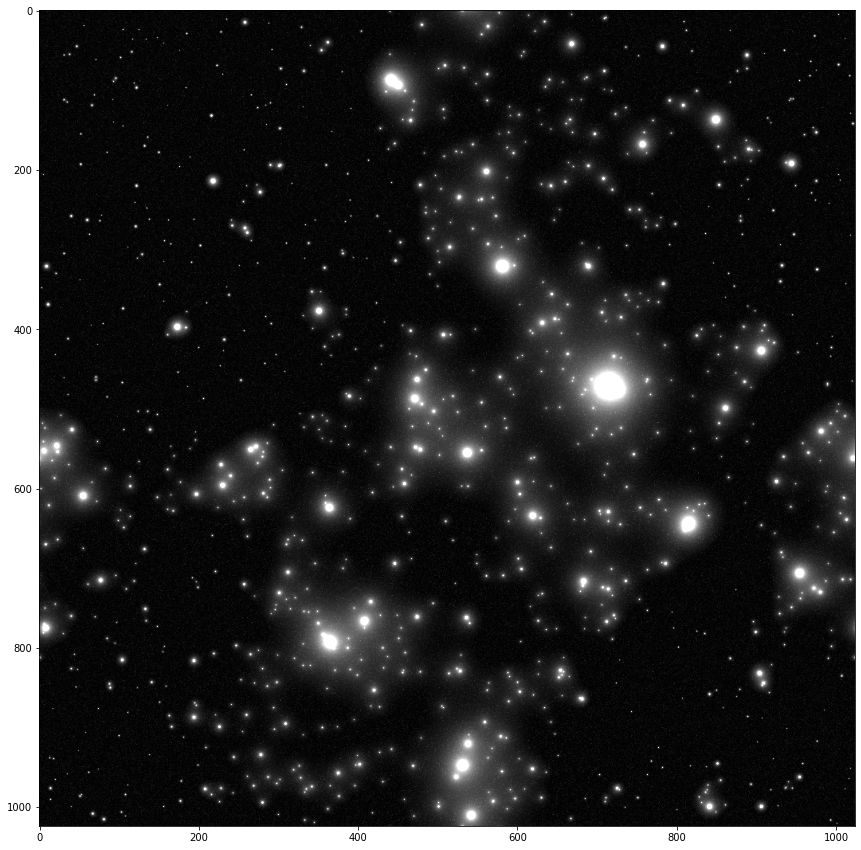

In [40]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
vmax = np.absolute(x_noise).max()
ax.imshow(x_noise, cmap=plt.gray(), vmin=0, vmax=vmax/1.25);

In [41]:
fig.savefig('../files/2021-03-27_generative.png', dpi=300)

Note that the size of the stars is not given by its actual physical size but by luminance. However, these two factors are *in theory* correlated (the closer the brighter) - but *in practice* the apparent dimension of a star will be less than that of a pixel on your sensor. Twinkle, twinkle little star...

# more...

## some book keeping for the notebook

In [42]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,SLIP,LogGabor,SparseEdges,matplotlib,scipy,pillow,imageio  -r -g -b

Python implementation: CPython
Python version       : 3.9.4
IPython version      : 7.19.0

numpy      : 1.20.2
SLIP       : not installed
LogGabor   : not installed
SparseEdges: not installed
matplotlib : 3.3.3
scipy      : 1.6.0
pillow     : not installed
imageio    : 2.9.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 20.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: ekla

Git hash: 07c978798548bc20d97a60201ff4cbcbe32ed43c

Git repo: https://github.com/laurentperrinet/sciblog.git

Git branch: master

